# Introducción

`Indicador S&P 500`

Standard & Poor's es una de las mayores agencias de calificación crediticia, que asigna
calificaciones a empresas y países considerando la deuda que emiten en una escala de AAA
a D, indicando su grado de riesgo de inversión.
El popular índice S&P 500 es quizás el producto más conocido de Standard & Poor's. Este
índice pondera la capitalización bursátil de las 500 mayores empresas que cotizan en la
bolsa de los Estados Unidos. El índice está considerado como el mejor indicador de la
renta variable estadounidense y es ampliamente utilizado y referenciado.
Una de las limitaciones del S&P y de otros índices ponderados, surge cuando existe
sobrevaloración de los índices, es decir, cuando suben más de lo que sus fundamentos
justifican. Si una acción tiene una gran ponderación en el índice y está sobrevalorada,
suele inflar el valor global o el precio del índice

# Objetivos



*   Hacer analisis minucioso del indice sp500
*   Sacar información y conclusiones de valor para determinar decisiones de inversion
*  Identificar Industrias o Sectores con mejor Retorno y contraponerlas con la información que se obtuvo anteriormente
*  Identificar días en donde conviene generar inversiones



# Adquisición de información

La información primaria o ‘cruda’ se obtuvo a través de Yahoo Finance utilizando la librería pandas-datareader en Python. Esta librería permite al usuario descargar los valores históricos de diversos indicadores bursátiles y crear un objeto tipo DataFrame para su visualización y manipulación. Los datos recogidos abarcan desde el 16 de mayo de 2011 hasta el 14 de mayo de 2021. Los datos importados representan un día de trading y contienen atributos como el precio de apertura, cierre, máximo diario y mínimo diario del S&P 500 además de 50 indicadores relevantes de la bolsa, entre índices, divisas, futuros y acciones, incluyendo el valor del indicador en cuestión del día anterior

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
# Obtener todos los símbolos de acciones del S&P 500
sp500_info = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_symbols = sp500_info['Symbol'].tolist()

In [4]:
# Acoto la fecha en la que deseo la información, por requerimiento traigo desde el 2000 al 2023
start_date = '2000-01-01'
end_date = '2023-02-22'

In [5]:
# Creao un DF para almacenar los datos
sp500 = pd.DataFrame()

In [6]:
# Voy agregando los datos correspondientes a cada símbolo
for symbol in sp500_symbols:
    print(f"Descargando datos para {symbol}...")
    data = yf.download(symbol, start=start_date, end=end_date)
    if len(data) > 0:
        data['Symbol'] = symbol
        sp500 = sp500.append(data)

Descargando datos para MMM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AOS...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABT...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABBV...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ACN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ATVI...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADBE...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADP...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AAP...
[*********************100%***********************]  1 of 1 completed
Descarg

# Analisis introductorio de la información de ese dataset

Ahora que tenemos los datos, podemos empezar con el EDA. 

In [7]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2605020 entries, 2000-01-03 to 2023-02-21
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Adj Close  float64
 5   Volume     int64  
 6   Symbol     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 159.0+ MB


Imprimiré las primeras cinco filas del DataFrame para obtener una vista previa de los datos:

In [8]:
sp500.head()


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM


Podemos observar que el DataFrame tiene un índice de 1 nivel (la fecha), y las columnas corresponden a los precios de apertura, máximo, mínimo y cierre, el precio ajustado y el volumen de transacciones.

A continuación, imprimiré el resumen de las estadísticas descriptivas del DataFrame:

In [9]:
print(sp500.describe())

               Open          High           Low         Close     Adj Close  \
count  2.605020e+06  2.605020e+06  2.605020e+06  2.605020e+06  2.605020e+06   
mean   7.260396e+01  7.346485e+01  7.172131e+01  7.261482e+01  6.424758e+01   
std    1.448828e+02  1.467120e+02  1.430492e+02  1.449173e+02  1.416385e+02   
min    6.041700e-02  6.104200e-02  5.395800e-02  6.104200e-02  6.104200e-02   
25%    2.326000e+01  2.358000e+01  2.293000e+01  2.326000e+01  1.683413e+01   
50%    4.238000e+01  4.289000e+01  4.187000e+01  4.239000e+01  3.309344e+01   
75%    7.709000e+01  7.790000e+01  7.626000e+01  7.710000e+01  6.633000e+01   
max    5.977610e+03  5.982450e+03  5.884060e+03  5.959330e+03  5.959330e+03   

             Volume  
count  2.605020e+06  
mean   6.639565e+06  
std    3.226503e+07  
min    0.000000e+00  
25%    9.063000e+05  
50%    2.060100e+06  
75%    4.868500e+06  
max    7.421641e+09  


Esto nos da un resumen de las estadísticas descriptivas de todas las variables numéricas en el DataFrame

Una vez realizado el análisis univariado, podemos profundizar en el análisis bivariado para entender cómo se relacionan entre sí las diferentes variables del dataset.



In [ ]:
#Empiezo analizando la correlación entre las variables numéricas:
#sns.pairplot(sp500, vars=["Open", "High", "Low", "Close", "Volume"])

#Podemos observar que existe una alta correlación entre las variables "Open", "High", "Low" y "Close", lo que es esperable ya que estas variables están relacionadas con el precio de las acciones. También podemos notar que la variable "Volume" no parece tener una correlación clara con el precio de las acciones.

Veamos ahora cómo se relacionan el volumen y la fecha:

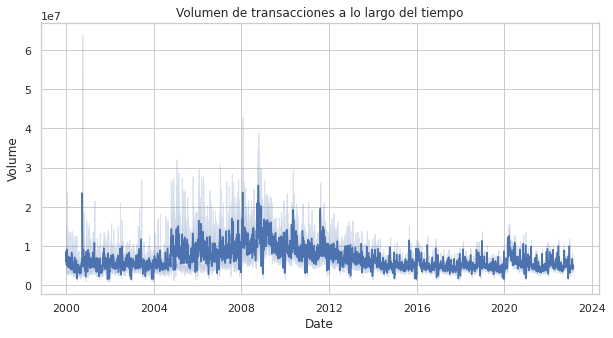

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x="Date", y="Volume", data=sp500, ax=ax)
ax.set(title="Volumen de transacciones a lo largo del tiempo")
plt.show()


Podemos observar que el volumen de transacciones varía mucho a lo largo del tiempo. Además, parece haber algunos picos en el volumen que coinciden con eventos económicos importantes, como la crisis financiera de 2008 y la pandemia de COVID-19 en 2020.

In [11]:
#Cambio de los índices agregando a la fecha como columna ya que la traia como índice
sp500= sp500.reset_index()

In [12]:
sp500.shape

(2605020, 8)

In [13]:
sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
2605015,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS
2605016,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS
2605017,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS
2605018,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,ZTS
2605019,2023-02-21,171.529999,172.080002,168.660004,169.839996,169.839996,1791300,ZTS


In [14]:
#Corroboro
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM
2,2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM
3,2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM
4,2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM


# Agrego más información

Traigo información de otra fuente que me completa información que la API anterior no tiene, y que me gustaria visualizar en el analisis y que corresponde tambien al S&P 500, como seguridad, sector, su-industria, ubicación de la sede, fecha de creación, CIK, Fundación.

In [15]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [16]:
# Usar la función read_html() para leer la tabla desde la página web
tabla= pd.read_html(url)

In [17]:
# La tabla que nos interesa es la primera
sp500_tabla= tabla[0]

In [18]:
# Imprimir los primeros cinco registros del DataFrame
sp500_tabla.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


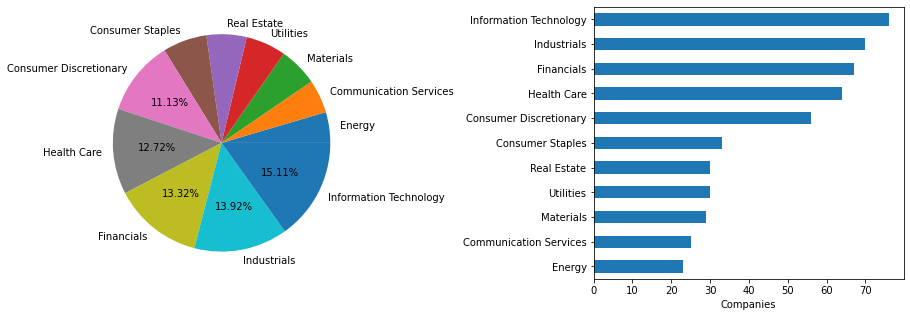

In [19]:
#Gráfico de barra de todos los sectores
#data for plotting
sectors = sp500_tabla['GICS Sector'].value_counts(ascending=True)

fig, axs= plt.subplots(1, 2, figsize=(15, 5))


#pie plot
def autopct(pct): # only show the label when it's > 10%
    return ('{:.2f}%'.format(pct))  if pct > 10 else ''


sectors.plot(kind='pie', autopct=autopct, ax=axs[0])
axs[0].axes.get_yaxis().set_visible(False)

#bar plot
sectors.plot(kind='barh', ax=axs[1])
axs[1].set_xlabel('Companies')

plt.subplots_adjust(wspace=0.7)

Uno estas dos tablas

 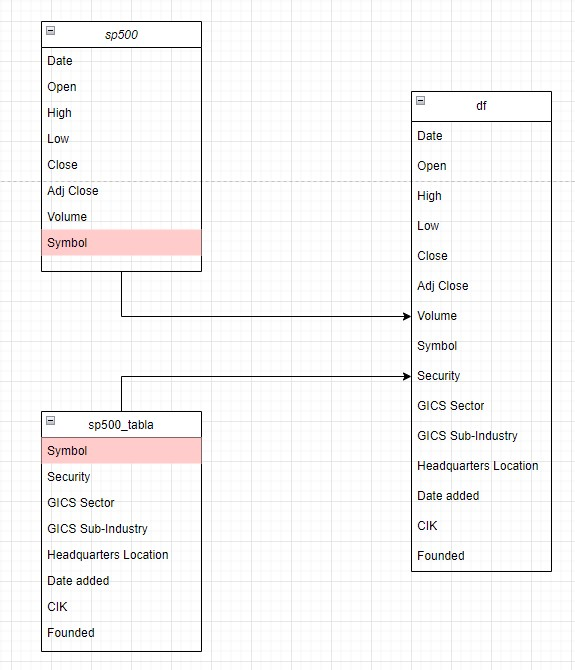

In [37]:
# Uno por el campo "Symbol"
df = pd.merge(sp500, sp500_tabla, on='Symbol')

In [38]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2605020 entries, 0 to 2605019
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Open                   float64       
 2   High                   float64       
 3   Low                    float64       
 4   Close                  float64       
 5   Adj Close              float64       
 6   Volume                 int64         
 7   Symbol                 object        
 8   Security               object        
 9   GICS Sector            object        
 10  GICS Sub-Industry      object        
 11  Headquarters Location  object        
 12  Date added             object        
 13  CIK                    int64         
 14  Founded                object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 318.0+ MB


In [40]:
#Agrego una columna con los días de la semana, que me puede servir para un analisis posterior

Day = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'}

#Uno el df con los datos del dicc asignando para cada fecha un día correspondiente.

df['Day'] = df['Date'].dt.dayofweek.map(Day)

Voy a cambiar el nombre de los encabezados para unificar toda la presentación en español.

In [41]:

nuevos_nombres = {
    'Date': 'Fecha',
    'Open': 'Apertura',
    'High': 'Alta',
    'Low': 'Baja',
    'Close': 'Cierre',
    'Adj Close': 'Cierre_Ajustado',
    'Volume': 'Volumen',
    'Symbol': 'Símbolo',
    'Return': 'Retorno',
    'Security': 'Seguridad',
    'GICS Sector': 'Sector',
    'GICS Sub-Industry': 'Subindustria',
    'Headquarters Location': 'Ubicación_Sede',
    'Date added': 'Fecha_adición',
    'CIK': 'Claves_Indice_Central',
    'Founded': 'Fundado',
    'Day': 'Día'
}

df = df.rename(columns=nuevos_nombres)

In [ ]:
# Guarda el DataFrame con los nuevos nombres de columnas
df.to_csv('unionSP500espaniol.csv', index=False)

In [42]:
df.head()

,Fecha,Apertura,Alta,Baja,Cierre,Cierre_Ajustado,Volumen,Símbolo,Seguridad,Sector,Subindustria,Ubicación_Sede,Fecha_adición,Claves_Indice_Central,Fundado,Día
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Lunes
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Martes
2,2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Miercoles
3,2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Jueves
4,2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Viernes


# Ahora hago un análisis de datos exploratorio para todo el conjunto de datos unificado.

### Variación de las industrias (Promedio de las Industrias): 


El "industry mean" se refiere al promedio ponderado de las empresas dentro de un sector específico del S&P 500. Por ejemplo, si consideramos el sector tecnológico del S&P 500, el industry mean se refiere al promedio ponderado de las empresas de tecnología que forman parte del índice S&P 500.

Calcular el industry mean puede ser útil para los inversores que buscan comprender mejor el rendimiento de un sector específico del mercado de valores. Al comparar el rendimiento de una empresa en particular con el industry mean de su sector, los inversores pueden obtener una mejor comprensión de si la empresa está superando o quedando rezagada en relación a sus competidores dentro del mismo sector.

Para calcular la variación de las industrias del S&P 500, es necesario agrupar las empresas por sector y luego calcular la variación promedio de los precios de cierre ajustados de las empresas en cada sector.

In [26]:
#Agrupo por sector
indutrias_df = df.groupby('Sector')

In [27]:
#Calculo el promedio de cierre para cada insdustria
ind_mean = indutrias_df['Cierre'].mean()

In [28]:
#Ordeno 
ind_mean_ord = ind_mean.sort_values(ascending=False)

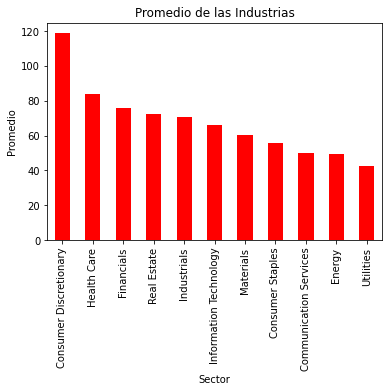

In [29]:
#Grafico
import matplotlib.pyplot as plt

ax = ind_mean_ord.plot(kind='bar', color= 'red')
ax.set_title('Promedio de las Industrias')
ax.set_xlabel('Sector')
ax.set_ylabel('Promedio')
plt.show()


 El precio de cierre ajustado refleja el valor de mercado de la acción al final del día y puede ser una buena medida de rendimiento a largo plazo. Además, el sector es una forma común de clasificar las empresas y puede ser útil para comparar el rendimiento de las empresas dentro de un sector específico.

Sin embargo, es importante tener en cuenta que otros factores, como el volumen de negociación y los eventos específicos de la empresa, también pueden influir en el precio de las acciones. Por lo tanto, al tomar decisiones de inversión, es importante considerar una variedad de factores y no basarse únicamente en el precio de cierre ajustado y el sector. Además, también es importante asegurarse de utilizar datos precisos y actualizados para realizar cualquier análisis de inversión.

Por ello voy a calcularlo de a cuerdo al año, el sector, y el cierre ajustado, para comprobar si hay diferencias marcadas.

<ipython-input-30-88d8e152a358>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fecha"] = pd.to_datetime(df["Fecha"])
<ipython-input-30-88d8e152a358>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Año"] = df["Fecha"].dt.year


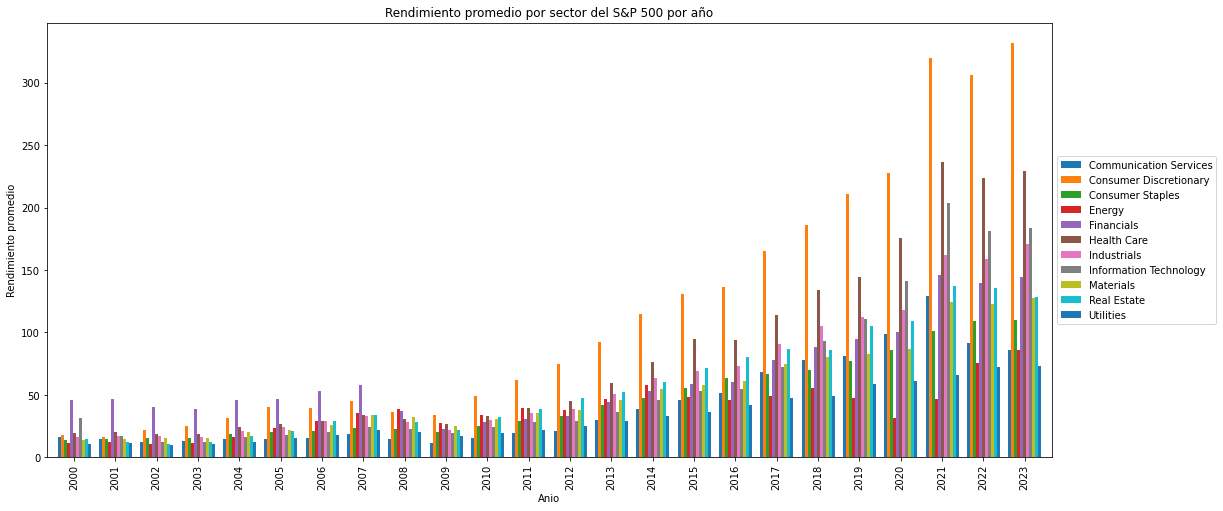

In [30]:
# Seleccionar las columnas necesarias
cols = ["Fecha", "Sector", "Cierre_Ajustado"]
df = df[cols]

# Convertir la columna de fecha a tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Agregar una columna de año
df["Año"] = df["Fecha"].dt.year

# Agrupar los datos por año y sector, y calcular el rendimiento promedio
df_sector = df.groupby(["Año", "Sector"])["Cierre_Ajustado"].mean().unstack()

# Graficar los datos
ax = df_sector.plot(kind="bar", figsize=(18, 8), width=0.8)

# Agregar etiquetas y título
ax.set_xlabel("Anio")
ax.set_ylabel("Rendimiento promedio")
ax.set_title("Rendimiento promedio por sector del S&P 500 por año")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()


Conclusiones:


*   El sector de tecnología ha sido el mejor desempeñado en términos generales, con rendimientos positivos en la mayoría de los años. El sector también ha tenido algunos años excepcionales, como 2009, 2012 y 2020, en los que los rendimientos fueron muy altos.

* Otros sectores, como los de salud, consumo discrecional y materiales, también han tenido un buen desempeño en algunos años, pero en general, su desempeño ha sido menos consistente que el de la tecnología.

* Algunos sectores, como el de energía y el financiero, han tenido un desempeño bastante variable a lo largo del tiempo. El sector financiero, en particular, tuvo un rendimiento negativo en algunos años, como 2008 y 2020, debido a la crisis financiera y la pandemia, respectivamente.

* En general, el gráfico muestra que el rendimiento de los sectores del S&P 500 varía ampliamente de un año a otro y que algunos sectores tienen un desempeño más consistente que otros.




### Variacion de los cierres a lo largo de los años.

In [43]:
# Creo una columna que contenga los años
df['Anio'] = df['Fecha'].dt.year


In [98]:
df.head()

,Apertura,Alta,Baja,Cierre,Cierre_Ajustado,Volumen,Símbolo,Seguridad,Sector,Subindustria,Ubicación_Sede,Fecha_adición,Claves_Indice_Central,Fundado,Día,Anio,daily_returns,year_returns
Fecha,,,,,,,,,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Lunes,2000,NaN,NaN
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Martes,2000,-0.039735,-0.039735
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Miercoles,2000,0.028965,0.028965
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Jueves,2000,0.080429,0.080429
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Viernes,2000,0.019851,0.019851


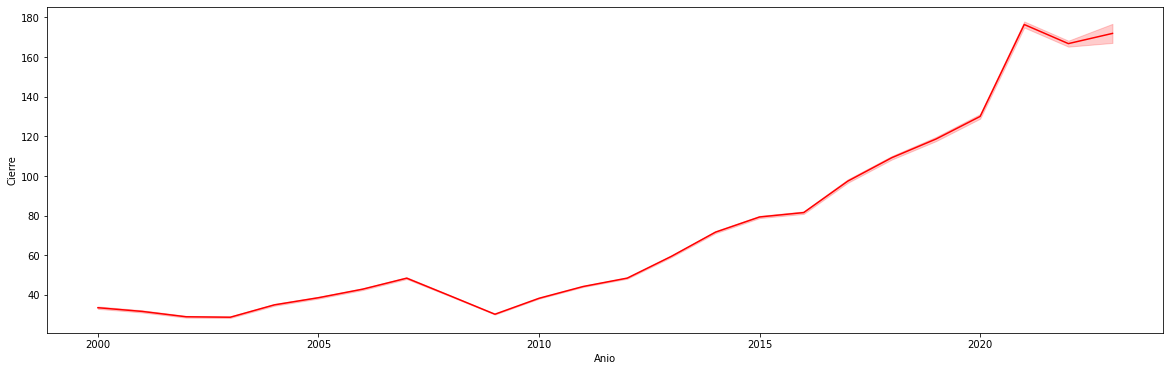

In [45]:
import seaborn as sns
plt.subplots(figsize=(20, 6))
sns.lineplot(data= df, x= 'Anio', y= 'Cierre', color='red' )
plt.show()

En resumen, la variación de los cierres del S&P 500 desde el año 2000 hasta la actualidad ha sido muy significativa y ha reflejado una serie de cambios económicos y políticos en todo el mundo. Durante este período, el índice ha experimentado una serie de altibajos, incluyendo la crisis financiera de 2008, el auge tecnológico de la década de 2010, y la pandemia de COVID-19 en 2020.

En general, el índice ha mostrado una tendencia al alza a largo plazo, con una serie de correcciones y ajustes en el camino. A pesar de la volatilidad, muchas empresas han logrado un crecimiento constante en el índice, lo que ha llevado a una rentabilidad significativa para los inversores a largo plazo.

A medida que la economía mundial continúa evolucionando y enfrentando nuevos desafíos, es probable que la variación de los cierres del S&P 500 siga siendo una fuente importante de información para los inversores y analistas financieros.

### Calculo la volatilidad

La volatilidad es una medida estadística de la magnitud de las fluctuaciones de los precios de un activo financiero durante un período de tiempo determinado. En general, cuanto mayor sea la volatilidad de un activo, mayor será su riesgo, ya que los precios pueden subir o bajar significativamente en un corto período de tiempo, lo que puede llevar a ganancias o pérdidas importantes para los inversores.

En el caso del S&P 500, la volatilidad se refiere a la variación en los precios de las 500 acciones que componen el índice durante un período de tiempo determinado. El S&P 500 es un índice bursátil que mide el rendimiento de las acciones de las principales empresas que cotizan en bolsa en Estados Unidos. Como tal, es considerado como un indicador importante de la economía estadounidense y de los mercados financieros globales.

In [76]:
# Convertir la columna de fecha a formato fecha de Pandas
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna de fecha como índice
df.set_index('Fecha', inplace=True)

In [77]:
df.head()

,Apertura,Alta,Baja,Cierre,Cierre_Ajustado,Volumen,Símbolo,Seguridad,Sector,Subindustria,Ubicación_Sede,Fecha_adición,Claves_Indice_Central,Fundado,Día,Anio,daily_returns,year_returns
Fecha,,,,,,,,,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Lunes,2000,NaN,NaN
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Martes,2000,-0.039735,-0.039735
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Miercoles,2000,0.028965,0.028965
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Jueves,2000,0.080429,0.080429
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Viernes,2000,0.019851,0.019851


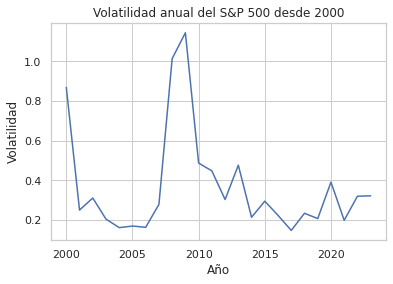

In [78]:
# Calcular la volatilidad anual
df['daily_returns'] = df['Cierre_Ajustado'].pct_change()
rolling_volatility = df['daily_returns'].rolling(window=252).std() * np.sqrt(252)
annual_volatility = rolling_volatility.resample('Y').last()

# Graficar la volatilidad anual
plt.plot(annual_volatility.index.year, annual_volatility.values)
plt.title('Volatilidad anual del S&P 500 desde 2000')
plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.show()

In [63]:
#Calculo numérico de la volatilidad
df['daily_returns'] = df['Cierre_Ajustado'].pct_change()
annual_volatility = np.sqrt(252) * df['daily_returns'].std()
print('Volatilidad anual del S&P 500 desde 2000:', round(annual_volatility * 100, 2), '%')


Volatilidad anual del S&P 500 desde 2000: 42.23 %


Para algunos inversores, una alta volatilidad podría ser una oportunidad para obtener mayores ganancias en un corto período de tiempo, mientras que para otros inversores, la alta volatilidad puede representar un mayor riesgo y, por lo tanto, buscarían inversiones con una volatilidad menor.

Es importante tener en cuenta que la volatilidad por sí sola no determina el éxito o el fracaso de una inversión. La volatilidad debe evaluarse junto con otros factores, como la rentabilidad histórica.

### Evalúo el retorno total.

Por último voy a evaluar el retorno total, ya que si hay algo en lo que el cliente querria hacer foco, sería esto. 

El retorno total de una compañía se refiere al rendimiento general que se obtiene al invertir en dicha compañía, teniendo en cuenta tanto las ganancias de capital (a través del aumento del valor de las acciones) como los ingresos por dividendos.

El retorno total puede expresarse en términos porcentuales y se calcula dividiendo el valor total de las ganancias (tanto las ganancias de capital como los ingresos por dividendos) por el monto total de la inversión. El retorno total es un indicador importante para los inversores ya que les permite evaluar la rentabilidad de su inversión a largo plazo.

In [50]:
# Agrupar el DataFrame por compañía y calcular la diferencia porcentual entre el precio de cierre de la primera fecha del DataFrame y el precio de cierre de la última fecha del DataFrame para cada compañía
returns = (df.groupby('Símbolo')['Cierre'].last() - df.groupby('Símbolo')['Cierre'].first()) / df.groupby('Símbolo')['Cierre'].first()

# Seleccionar las diez primeras compañías con el mayor retorno total
top_10_returns = returns.nlargest(10)


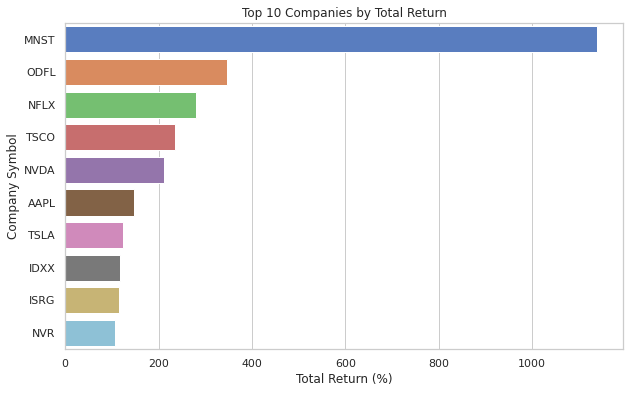

In [80]:
# Crear un gráfico de barras horizontales con Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_returns.values, y=top_10_returns.index, palette='muted')
plt.title('Top 10 Companies by Total Return')
plt.xlabel('Retorno total (%)')
plt.ylabel('Símbolo de la compañia')
plt.show()

Las conclusiones que se pueden extraer de las 10 compañías con el mejor retorno total en el S&P 500 pueden depender del período de tiempo específico que se esté analizando. Sin embargo, aquí hay algunas posibles conclusiones generales:

*  Las compañías con el mejor retorno total son aquellas que han generado un 

rendimiento positivo significativo a largo plazo en el mercado de valores.

*  Las compañías con el mejor retorno total pueden haber experimentado un crecimiento sostenible a lo largo del tiempo, lo que podría estar respaldado por una estrategia comercial efectiva y una gestión sólida.

*  Las compañías con el mejor retorno total pueden ser líderes en su sector y tener una ventaja competitiva en el mercado.

*  Las compañías con el mejor retorno total pueden tener un perfil de riesgo más alto, ya que es probable que hayan experimentado fluctuaciones significativas en su precio de mercado a lo largo del tiempo.

*  Las compañías con el mejor retorno total pueden tener una capitalización de mercado significativa y ser consideradas "blue chips" en el mercado de valores.

Mejor retorno:
*   Monster comercializa bebidas energizantes
* Old Dominion Freight Line envios regionales, interregionales y nacionales de menos de un camión
*  Netflix plataforma de streaming
*  Tractor Supply Company, es una cadena de tiendas que vende productos para mejoras del hogar y agricultura.
*  Nvidia Corporation es una empresa de software y fabless
*  Apple es una empresa tecnológica
*  Tesla, diseña, fabrica y vende automóviles eléctricos
*   IDEXX venta de productos y servicios para los mercados de animales de compañía
*  Intuitive Surgical desarrolla, fabrica y comercializa productos robóticos
*  NVR construcción de viviendas 


De las cuales puedo concluir que 5 de ellas son Empresas del sector tecnológico donde recomendaria invertir.

# Días de inversión

In [110]:
# Crear una columna que calcule la diferencia entre el precio de apertura y cierre para cada día
df['Diferencia'] = df['Cierre'] - df['Apertura']

In [111]:
df.head(1)

,Apertura,Alta,Baja,Cierre,Cierre_Ajustado,Volumen,Símbolo,Seguridad,Sector,Subindustria,Ubicación_Sede,Fecha_adición,Claves_Indice_Central,Fundado,Día,Anio,daily_returns,year_returns,Diferencia,Signo
Fecha,,,,,,,,,,,,,,,,,,,,
2000-01-03,48.03125,48.25,47.03125,47.1875,25.525522,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Lunes,2000,NaN,NaN,-0.84375,-1


In [112]:
df['Signo'] = df['Diferencia'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

In [121]:
df.head()

,Apertura,Alta,Baja,Cierre,Cierre_Ajustado,Volumen,Símbolo,Seguridad,Sector,Subindustria,Ubicación_Sede,Fecha_adición,Claves_Indice_Central,Fundado,Día,Anio,daily_returns,year_returns,Diferencia,Signo
Fecha,,,,,,,,,,,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525522,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Lunes,2000,NaN,NaN,-0.84375,-1
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Martes,2000,-0.039735,-0.039735,-1.12500,-1
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221235,3699400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Miercoles,2000,0.028965,0.028965,1.06250,1
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Jueves,2000,0.080429,0.080429,3.21875,1
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790688,4101200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Viernes,2000,0.019851,0.019851,0.81250,1


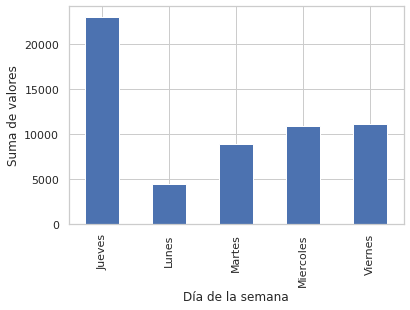

In [115]:
# Agrupar los datos por día y calcular la suma de los valores
suma_valores = df.groupby('Día')['Signo'].sum()

# Crear el gráfico de barras
suma_valores.plot(kind='bar')

# Configurar los ejes y etiquetas
plt.xlabel('Día de la semana')
plt.ylabel('Suma de valores')

# Mostrar el gráfico
plt.show()

In [123]:
df = df.reset_index()

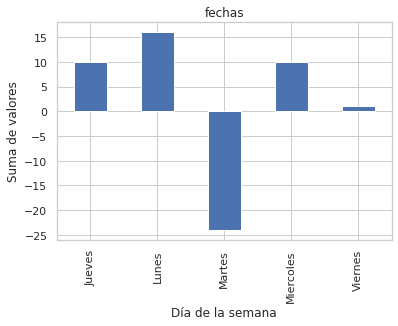

In [126]:
# Definir los parámetros de filtrado
fecha_desde = '2018-01-01'
fecha_hasta = '2023-02-22'

# Filtrar los datos por símbolo y rango de fechas
datos_filtrados = df.loc[(df['Símbolo'] == 'MNST') & (df['Fecha'] >= fecha_desde) & (df['Fecha'] <= fecha_hasta)]

# Agrupar los datos por día y calcular la suma de los valores
suma_valores = datos_filtrados.groupby('Día')['Signo'].sum()

# Crear el gráfico de barras
suma_valores.plot(kind='bar')

# Configurar los ejes y etiquetas
plt.xlabel('Día de la semana')
plt.ylabel('Suma de valores')
plt.title('fechas')

# Mostrar el gráfico
plt.show()

### Dataframe final.

In [127]:

df.to_csv('sp500.csv', index=False)


Exporto a Parquet

In [135]:
import pyarrow as pa
import pyarrow.parquet as pq


In [132]:
table = pa.Table.from_pandas(df)


In [141]:
output_filename = 'sp500.parquet'
output_path = 'PI2' + output_filename


In [142]:
pq.write_table(table, output_path)
